In [ ]:
#Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Look at directory
%cd /content/drive/My Drive/data/YoloCountyCrops
%ls # then you should see the data file

/content/drive/My Drive/data/YoloCountyCrops
model.png  YoloCountyCropsML.csv


In [ ]:
#Load the data
data=pd.read_table("YoloCountyCropsML.csv", sep=",")

In [ ]:
# define X (input features), and y(class labels) - occupancy data
X=data.drop(["Unnamed: 0","OBJECTID", "OBJECTID_1", "acres", "croptype"],axis=1)
y=data["croptype"]

In [ ]:
#Normalize the input data
X_norm=preprocessing.scale(X)
#Split the data into train/test data
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, y, test_size=0.3, random_state=0)

In [ ]:
#SVM Classification type 1: Linear

#Set kernel type to linear
linear_svc=SVC(kernel='linear', C=15.0, probability=True) 

#Fit the data
linear_svc.fit(X_train,Y_train)

#Make Predictions
Y_predSVML = linear_svc.predict(X_test)

# Print Scores
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, Y_test)))

Training set score: 0.8823
Test set score: 0.8471


<Axes: >

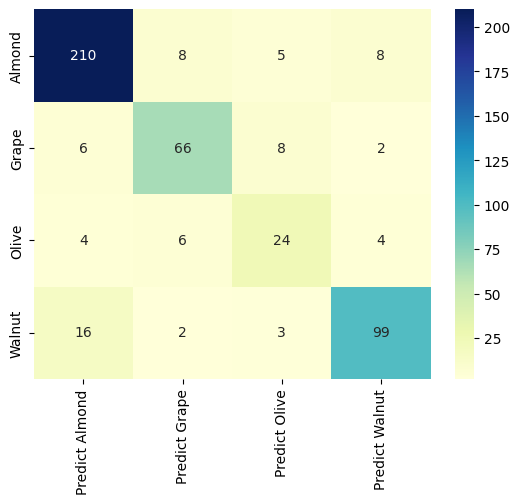

In [ ]:
#Create confusion matrix for Random Forests
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(Y_test, Y_predSVML)

cm_matrix = pd.DataFrame(data=confusionmatrix, columns=['Predict Almond', 'Predict Grape', 'Predict Olive', 'Predict Walnut'], 
                                 index=['Almond', 'Grape', 'Olive', 'Walnut'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#calculate accuracy
print(210 / (210 + 8 + 5 + 8)) #Almonds
print(66 / (66 + 6 + 8 + 2)) #Grapes
print(24 / (24 + 6 + 4 + 4)) #Olives
print(99 / (99 + 16 + 2 + 3)) #Walnuts

0.9090909090909091
0.8048780487804879
0.631578947368421
0.825
